# NSL Notebook 05

## Exercise 05.1.1

Importing `r-100-blk.csv` `r-210-blk.csv` , starting point origin = {0, 0, 0}, transition matrix uniform

In [1]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

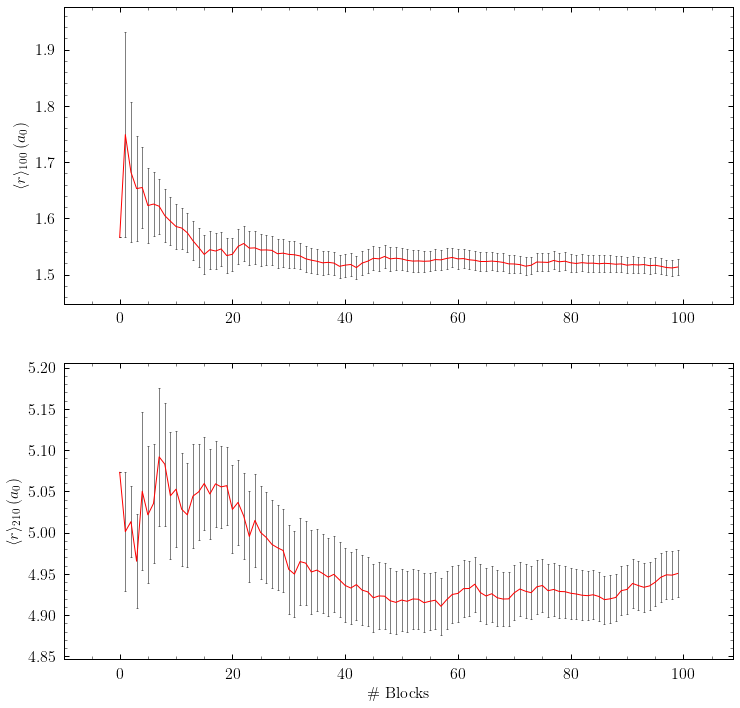

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

a0 = 0.0529 # Bohr radius nm

# load <r>_{100} results
df1 = pd.read_csv("r-100-blk.csv", header=None, names=["mean","mean_err"])/a0
df1["mean"].plot.line(yerr=df1["mean_err"], color='r', ecolor='gray', capthick=0.5, ax=ax1)

# load <r>_{210} results
df2 = pd.read_csv("r-210-blk.csv", header=None, names=["mean","mean_err"])/a0
df2["mean"].plot.line(yerr=df2["mean_err"], color='r', ecolor='gray', capthick=0.5, ax=ax2)

ax1.set_ylabel("$\\langle r \\rangle_{100}\;(a_0)$");
ax2.set_ylabel("$\\langle r \\rangle_{210}\;(a_0)$");

ax2.set_xlabel("\# Blocks");

### Exercise 05.1.2
Importing `r-g-100-blk.csv` `r-g-210-blk.csv` , starting point origin = {0, 0, 0}, transition matrix gaussian normal

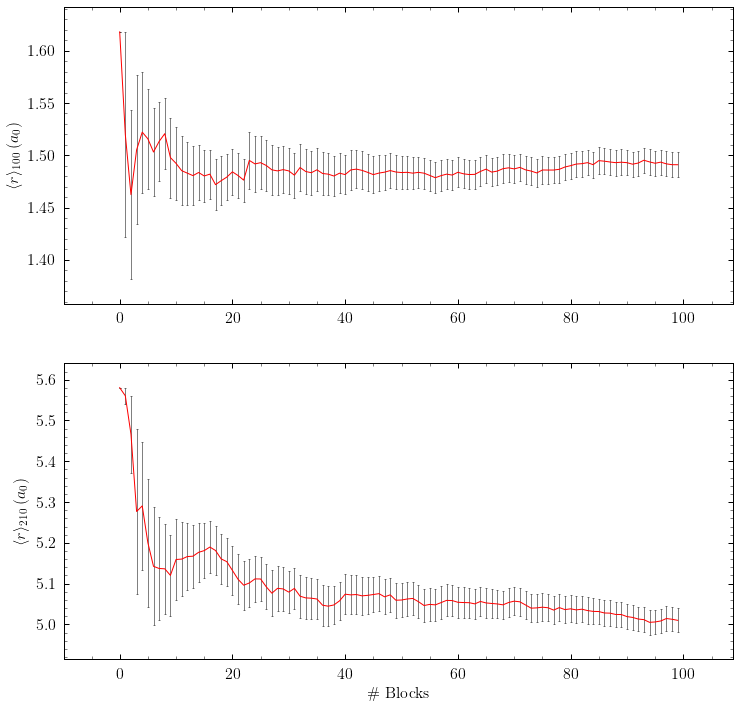

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

a0 = 0.0529 # Bohr radius nm

# load <r>_{100} results
df1 = pd.read_csv("r-g-100-blk.csv", header=None, names=["mean","mean_err"])/a0
df1["mean"].plot.line(yerr=df1["mean_err"], color='r', ecolor='gray', capthick=0.5, ax=ax1)

# load <r>_{210} results
df2 = pd.read_csv("r-g-210-blk.csv", header=None, names=["mean","mean_err"])/a0
df2["mean"].plot.line(yerr=df2["mean_err"], color='r', ecolor='gray', capthick=0.5, ax=ax2)

ax1.set_ylabel("$\\langle r \\rangle_{100}\;(a_0)$");
ax2.set_ylabel("$\\langle r \\rangle_{210}\;(a_0)$");

ax2.set_xlabel("\# Blocks");